In [ ]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [ ]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [ ]:
Base = automap_base()
Base.metadata.create_all(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)

from sqlalchemy.orm import Session
session = Session(bind=engine)

In [5]:

measurment = Base.classes.measurment

for row in session.query(measurment.id, measurment.station,measurment.date,measurment.prcp,measurment.tobs).limit(10).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65)
(2, 'USC00519397', '2010-01-02', 0.0, 63)
(3, 'USC00519397', '2010-01-03', 0.0, 74)
(4, 'USC00519397', '2010-01-04', 0.0, 76)
(5, 'USC00519397', '2010-01-07', 0.06, 70)
(6, 'USC00519397', '2010-01-08', 0.0, 64)
(7, 'USC00519397', '2010-01-09', 0.0, 68)
(8, 'USC00519397', '2010-01-10', 0.0, 73)
(9, 'USC00519397', '2010-01-11', 0.01, 64)
(10, 'USC00519397', '2010-01-12', 0.0, 61)


## Precipitation Analysis

In [48]:
sql_query = """
select *
from station
"""
station = pd.read_sql_query(sql_query, engine)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [18]:
sql_query = """
select
max(date)
,min(date)
from measurment
"""
precip_12 = pd.read_sql_query(sql_query, engine)
#precip_12.set_index('date', inplace=True)
precip_12.head()

,max(date),min(date)
0,2017-08-23,2010-01-01


In [30]:
sql_query = """
select
date
,prcp
from measurment
where date > '20160823' and date < '20170824'
order by date
"""
precip_12 = pd.read_sql_query(sql_query, engine)
precip_12.set_index('date', inplace=True)
precip_12.head()

,prcp
date,
2017-01-01,0.00
2017-01-01,0.29
2017-01-01,0.00
2017-01-01,0.03
2017-01-01,0.03


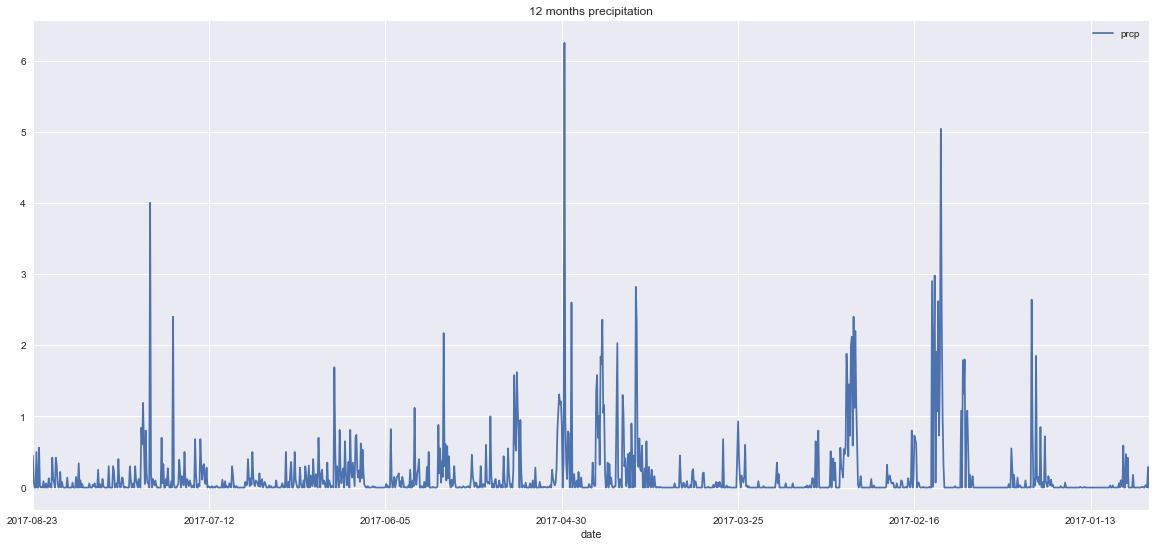

In [34]:
precip_12.iloc[::-1].plot(title='12 months precipitation',figsize=(20,9))
plt.show()

In [32]:
precip_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 2017-01-01 to 2017-08-23
Data columns (total 1 columns):
prcp    1267 non-null float64
dtypes: float64(1)
memory usage: 19.8+ KB


In [33]:
precip_12.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [35]:
sql_query = """
select
count(*) as NumberOfStations
from station
"""
stations = pd.read_sql_query(sql_query, engine)
stations.head()

,NumberOfStations
0,36


In [50]:
sql_query = """
select
s.station
,count(*) as NumberOfStations
from station s
inner join measurment m on s.station = m.station
group by s.station
order by count(*) desc
"""
stations = pd.read_sql_query(sql_query, engine)
stations

,station,NumberOfStations
0,USC00519281,11088
1,USC00513117,10784
2,USC00519397,10740
3,USC00519523,10288
4,USC00516128,9936
5,USC00514830,7748
6,USC00511918,7728
7,USC00517948,2732
8,USC00518838,1368


In [57]:
sql_query = """
select
m.station
,m.tobs
--,date
from measurment m
where date > '20160823' and date < '20170824'
and m.station = 'USC00519281'
order by date
"""
station = pd.read_sql_query(sql_query, engine)
station.head()

,station,tobs
0,USC00519281,72
1,USC00519281,70
2,USC00519281,64
3,USC00519281,63
4,USC00519281,63


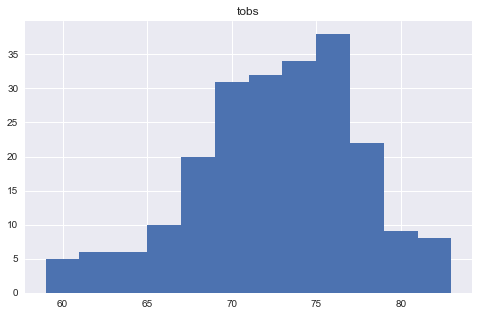

In [67]:
station.hist(column='tobs', bins=12,figsize=(8,5))
plt.show()

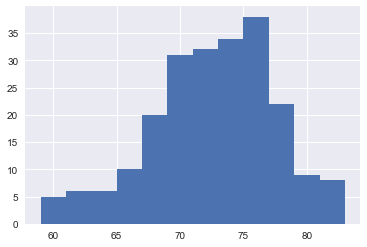

In [71]:
plt.hist(station['tobs'], bins=12)
plt.show()

In [ ]:
def calc_temps(start,end):
    